# From LDA, to naive Bayes to Logistic Regression

Author: Alexandre Gramfort

    LDA - QDA: 1h30
    Naive Bayes, logistic regression: 1h

In [ ]:
%matplotlib inline

Notations of binary classification:

- $\mathcal{Y}$ is the set of labels, here we use $\mathcal{Y} = \{-1,1\}$ in a binary classification setup,
- $\mathbf{x} = (x_1,\dots,x_p) \in \mathcal{X}\subset \mathbb{R}^p$ is an observation (a sample),
- $ \mathcal{D}_n = \{(\mathbf{x}_i , y_i), i=1,\dots n\}$ a train set
containing $n$ samples and the associated labels,
- there is a probability model which governs the generation of the data $X$ et $Y$:
$$ \forall i \in \{1,\dots,n\},  (\mathbf{x}_i , y_i) \stackrel{i.i.d }{\sim} (X,Y)$$.
- The objective is to construct from a training set $ \mathcal{D}_n $ a function
$\hat{f}:\mathcal{X} \mapsto  \{-1,1\}$ which for an unknown sample $\mathbf{x}$
(i.e. not present in the training set) can predict its label : $\hat{f}(\mathbf{x})$.

**HAA_NOTE:** 
1. Perhaps the simplest approach to classification is to use the density estimation strategy and assume a parametric model for the
densities. 
Suppose that Y = {-1,1} and that f0(x) = f(x|Y=0)
and f1(x) = f(x|Y=1) are both multivariate Gaussians
2. LDA and QDA make the assumption that data is distributed upon Gaussian distribution

### Gaussian distribution

Gaussian density in dimension $p$, $\mathcal{N}_p(\mu, \Sigma)$ is given as :
$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{p/2} \sqrt{\det(\Sigma)}} \exp\left\{ -\frac{1}{2} 
(\mathbf{x}-\mu)^\top \Sigma^{-1} (\mathbf{x}-\mu)\right\}~.
$$
where the covariance matrix of a random vector $X$ is defined as 
$\Sigma = \mathbb{E} \bigl[ (X-\mathbb{E}(X)) (X-\mathbb{E}(X))^\top\bigr]$.


#### in 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

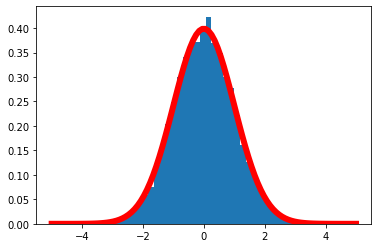

In [61]:
a = np.random.randn(10000)  # => Retourne une distribution normale Gaussienne de Mu=0 et Std==1
plt.hist(a, density=True, bins=40);

# Comme la Classification est aussi une distribution normale Gaussienne ( f(x): x --> {-1,1} => Mu == 0 et Std ==1)
# Plottons la Classification en remplaçant Mu et Std dans la formule ci dessus
t = np.linspace(-5, 5, 100)
plt.plot(t, 1. / np.sqrt(2 * np.pi) * np.exp(-t**2 / 2), 'r', linewidth=6);

#### in 2D

In [25]:
mu = [2, 2]
sigma1 = [[1, 0], [0, 1]]    # variance egale + !Covariance => distribution circulaire symetrique pour les 2 dimension
sigma2 = [[4, 0], [0, 1]]    # variance differente + !Covariance => distribution elliptique orthogonale aux abscisses ou aux ordonées
sigma3 = [[1, .8], [.8, 1]]  # variance egale + Covariance egale => rotation de la distribution 
'''
https://math.stackexchange.com/questions/1991961/gaussian-distribution-is-isotropic
Si !Covariance ET on est ds un système linéaire => les dimensions sont independantes
When the dimensions/variables are independent => Covariance is Zeros and the distrubtion is isotropic,
NB: However, in non linear model: The variables of the multivariate Gaussian may not be independent, even if they have zero covariance.
'''
# The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions
# Draw random samples from a multivariate normal distribution.
X = np.random.multivariate_normal(mu, sigma1, size=2000) 
print(X.shape)

(2000, 2)


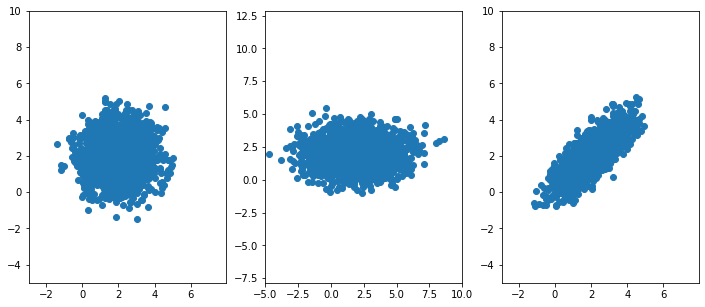

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for ax, sigma in zip(axes, [sigma1, sigma2, sigma3]):  # 'zip' keyword used to group iterable
    X = np.random.multivariate_normal(mu, sigma, size=2000)
    ax.scatter(X[:, 0], X[:, 1])
    ax.axis('equal')  # Set equal scaling (i.e., make circles circular) by changing axis limits
    ax.set_xlim([-5, 10])
    ax.set_ylim([-5, 10])

## Generative models

Conditional probability:

$$
f_k(x) = \mathbb{P}\{x | y = k\}
$$

Probability of being in class k:
$$
\mathbb{P}\{y = k\} = \pi_k
$$

Mixture model:
$$
\mathbb{P}\{x\} = \sum_{k \in \{-1, 1\}} \pi_k f_k(x)
$$

Bayes' rule:
$$
\mathbb{P}\{y=k | x\} = \frac{\mathbb{P}\{y = k\} \mathbb{P}\{x | y = k\}}{\mathbb{P}\{x\}} = \frac{\pi_k f_k(x)}{\sum_{k' \in \{-1, 1\}} \pi_{k'} f_{k'}(x)}
$$

### LDA (Linear Discriminant Analysis)

When using a linear discriminant analysis (LDA) we assume:

$$
\mathbb{P}\{x | y=1\} = \mathcal{N}_p(\mu_1, \Sigma)
$$

$$
\mathbb{P}\{x | y=-1\} = \mathcal{N}_p(\mu_{-1}, \Sigma)
$$

i.e. the conditional probability are Gaussian with **same covariance** but **different centers** for each class.

#### Example:

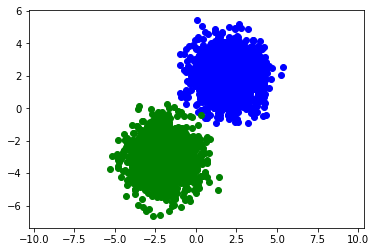

In [201]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py
# Si la covariance est la même pour les 2 distributions X1 et X2, alors l'algo LDA peut etre utilisé pour tracer la décision boundary
mu1 = [2, 2]
mu2 = [-2, -3]
sigma = [[1, 0], [0, 1]]

X1 = np.random.multivariate_normal(mu1, sigma, size=2000) # Generer une distribution Gaussienne de Moyenne mu1 et Variance sigma de 2000 échantillons
X2 = np.random.multivariate_normal(mu2, sigma, size=2000)

plt.scatter(X1[:, 0], X1[:, 1], color='b')
plt.scatter(X2[:, 0], X2[:, 1], color='g');
plt.axis('equal');

Log ratio:

$$
\log \left(\frac{\mathbb{P}\{Y=+1 \mid X=\mathbf{x}\}}{\mathbb{P}\{Y=-1 \mid X=\mathbf{x}\}}\right)
= x^T \Sigma^{-1} (\mu_{1} - \mu_{-1}) + \frac{1}{2} (\mu_{1}^T \Sigma^{-1} \mu_{1} - \mu_{-1}^T \Sigma^{-1} \mu_{-1}) + \log(\frac{\pi_{1}}{\pi_{-1}})
$$

Decision function:

$$
x^T \Sigma^{-1} (\mu_{1} - \mu_{-1}) + \frac{1}{2} (\mu_{1}^T \Sigma^{-1} \mu_{1} - \mu_{-1}^T \Sigma^{-1} \mu_{-1}) + \log(\frac{\pi_{1}}{\pi_{-1}}) > 0 \Rightarrow y = 1
$$

It is a **linear** function of the features !

### Example

In [47]:
# Python Tests
a = np.zeros((2,3))
print(a.reshape(-1))
print(a.ravel())

[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


In [77]:
# Python Tests
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9], [10, 11, 12]])

# Translates slice objects to concatenation along the second/column axis.
print(np.c_[a, b])

# Translates slice objects to concatenation along the first/row axis.
print(np.r_[a, b])

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [125]:
# Python Tests
a = np.array([1,2,3,4])
b = np.array([5,6,7])
c = np.array([8,9])
#
# The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.
# Return coordinate matrices from coordinate vectors.
# indexing : {'xy', 'ij'}, optional
# 1 - Cartesian ('xy', default)   
aa, bb = np.meshgrid(a,b) # => XCart.aa==XCart.bb==Dim.a --> 4 ET pareil pr YCart.aa==YCart.bb==Dim.b --> 3
print(aa)
print(bb)

#2 - Matrix ('ij') indexing of output.
# aa, bb = np.meshgrid(a,b, indexing='ij') # => iRow.aa==iRow.bb==Dim.a --> 4 ET pareil pr jCol.aa==jCol.bb==Dim.b --> 3
# print(aa)
# print(bb)


[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]]


In [ ]:
# Python test
# >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
# array([[1, 4],
#        [2, 5],
#        [3, 6]])

# >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
# array([[1, 2, 3, 0, 0, 4, 5, 6]])


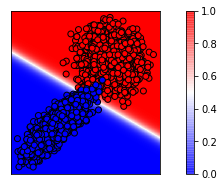

In [178]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def demo_clf(clf, X, y, proba=False):
    clf.fit(X, y)

    h = .02  # step size in the mesh. It sets the perpecption of color continuity inside the meshgrid
    # Plot the decision boundary. For that, we will assign a color to each point in the mesh x:[x_min, m_max] y:[y_min, y_max].
    # Set the X and Y range of the meshgrid to be plotted latter
    x_min, x_max = X[:, 0].min() - .5,     X[:, 0].max() + .5   # min : -5.36 - .5 / max : 5.72 + .5
    y_min, y_max = X[:, 1].min() - .5,     X[:, 1].max() + .5
    
    # https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
    # The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.
    # => xx et yy de même shape /  -5,.. <= xx et yy <= 5,..
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     print(np.arange(x_min, x_max, h).shape) # shape --> 614 
#     print(np.arange(y_min, y_max, h).shape) # shape --> 645 
#     print (xx.shape)  # (645==Nbre-d-elemts-comprises-entre-x_min-et-x_max, 614)  (645, 614)
#     print (yy.shape)  # (645, 614==Nbre-d-elemts-comprises-entre-y_min-et-y_max )
#     print(np.c_[xx.ravel(), yy.ravel()].shape) # (396030, 2)  614*645==396030
    
    if proba:
        # Estimate probability for Intput 'X' / Xarray-like, shape (n_samples, n_features)
        #      - np.c_[] --> Translates several slice objects to concatenation along the second axis: https://stackoverflow.com/questions/10894323/what-does-the-c-underscore-expression-c-do-exactly/51884244
        #      - numpy.ravel() == numpy.reshape(-1)
        Z = clf.predict_proba( np.c_[xx.ravel(), yy.ravel()] )[:, 1]  # np.c_ == np.hstack --> Add along column / second axis.
        # => It returns estimated probability array Z of shape (n_samples, n_classes).
        #    For each row in Z, it displays on columns the probability of having each of the n_classes
        #    [:, 1] => Get the probability of Class 'located at index 1' for all samples
    else:
        # Predict class labels for samples in Input 'X' / Xarray_like or sparse matrix, shape (n_samples, n_features)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  
        # => It returns an array Z of shape [n_samples]
        #    Each element contains the Predicted class label per sample

    # Set the size and the color of the plot
    plt.figure(1, figsize=(4, 3))
    cmap = plt.cm.bwr  # blue-white-red divergent

    # Z contains the Probability or Prediction value upon the rectangle represented by the meshgrid
    Z = Z.reshape(xx.shape) # Reshape Z to represent the regtangular grid. xx.shape --> (645,614)

    # Color 'divergently' the background of the 'mesh - The rectangular grid'.
    # The color is selected according to values in Z matrix. Z is the propability of 'y - the output' to be equal to 1
    # The selected color is either Blue or Red (cmap = bwr)
    plt.pcolormesh(xx, yy, Z, cmap=cmap, clim=[0, 1], alpha=0.5) # Z as an argument corresponds to: A scalar 2-D array. The values of Z will be color-mapped.
    plt.clim([0, 1]) # sets the color limit to the bar plot. Not mandatory, bcause done in the #pcolormesh argument
    plt.colorbar()

    # Plot the 2 training points distribution X0 and X1 + Assign the color defined by the Vector 'y'
    # c : A sequence of n numbers to be mapped to colors using *cmap* and *norm*.
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap)

    plt.axis('square')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())  # A list of positions at which ticks should be placed. You can pass an empty list to disable xticks.
    plt.yticks(())

# X1, X2 --> (2000,2) / Each of X1 and X2 is Normal Gaussian distribution (=> Cov <= 1) with different Mu(s) BUT same SIGMA(Cov)
X = np.concatenate((X1, X2), axis=0)  # X.shape -> (4000, 2)

# On construit 'y' de manière a avoir à '1' toute les réponses relatives à X1; Et égale à -1 celles relatives à X2 
y = np.array([1] * len(X1) + [-1] * len(X2))  # y.shape -> (4000,)

# LinearDiscriminantAnalysis : A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
# The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix for both distribution => Can use the LDA.
demo_clf(LinearDiscriminantAnalysis(), X, y, proba=True)

In [179]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [180]:
clf.coef_, clf.intercept_
# clf.coef      -> Weight vector(s)
# cfl.intercept -> Intercept term

(array([[2.32705815, 4.04048485]]), array([2.02345639]))

## QDA (Quadratic discriminant analysis)

When using a quadratic discriminant analysis (QDA):

$$
\mathbb{P}\{x | y=1\} = \mathcal{N}_p(\mu_1, \Sigma_{1})
$$

$$
\mathbb{P}\{x | y=-1\} = \mathcal{N}_p(\mu_{-1}, \Sigma_{-1})
$$

i.e. different covariances with different centers for each class.

as a consequence with have a **quadratic** boundary.

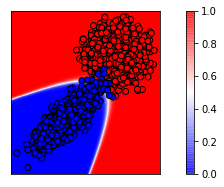

In [194]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

mu1 = [2, 2]
mu2 = [-2, -3]
sigma1 = [[1, 0], [0, 1]]
sigma2 = [[1, 0.8], [0.8, 1]]

X1 = np.random.multivariate_normal(mu1, sigma1, size=2000)
X2 = np.random.multivariate_normal(mu2, sigma2, size=2000)
X = np.r_[X1, X2]
y = np.array([1] * len(X1) + [-1] * len(X2))

demo_clf(QuadraticDiscriminantAnalysis(), X, y, proba=True)

# Naive Bayes

Naive Bayes is also a **generative** model. It however assumes that all the features are independent conditionnaly on $y$.

$$
\mathbb{P}\{x | y=k\} = \prod_{j=1}^p \mathbb{P}\{x_j | y=k\}
$$

### Gaussian Naive Bayes

$$
\mathbb{P}\{x_j | y=k\} = \frac{1}{(2\pi)^{1/2} \sigma_j^k} \exp \left\{ -\frac{
(x_j-\mu_j^k)^2}{2 (\sigma_j^k)^2}\right\}~.
$$

As the variance parameters dependent on the class we have a quadractic boundary condition.

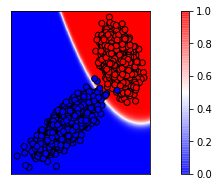

In [204]:
from sklearn.naive_bayes import GaussianNB

mu1 = [2, 2]
mu2 = [-2, -3]
sigma1 = [[0.3, -0.2], [-0.2, 1]]
sigma2 = [[1, 0.8], [0.8, 1]]

X1 = np.random.multivariate_normal(mu1, sigma1, size=2000)
X2 = np.random.multivariate_normal(mu2, sigma2, size=2000)
X = np.r_[X1, X2]
y = np.array([1] * len(X1) + [-1] * len(X2))

demo_clf(GaussianNB(), X, y, proba=True)

#### Question : Can I estimate Naive Bayes with streaming data?

**HAA_NOTES:**
1. A more direct approach to classification is to estimate the regression function r(x) = E (Y jX = x) without bothering to estimste the densities fk.
The simplest regression model is the linear regression model

2. LDA and logistic regression (with linear decision boundary) both lead to a
linear classification rule. In LDA we estimate the entire joint
distribution f (x,y) = f (x|y)f(y). In logistic regression we only
estimate f (yjx) and we don't bother estimating f (x)

## Logistic Regression

Logistic regression is a **discriminative** classification approach (although it's called regression...)

It follows the model of LDA with a log ratio that is a linear function of the features:

$$
\log \left(\frac{\mathbb{P}\{Y=+1 \mid X=\mathbf{x}\}}{\mathbb{P}\{Y=-1 \mid X=\mathbf{x}\}}\right)
= x^T \beta + \beta_0
$$

Decision function:

$$
x^T \beta + \beta_0 > 0 \Rightarrow y = 1
$$

It is a **linear** function of the features !

We then can get the conditional probabilities:

$$
\mathbb{P}\{Y=1 \mid X=\mathbf{x}\} = \frac{\exp(\mathbf{x}^T \beta + \beta_0)}{1 + \exp(\mathbf{x}^T \beta + \beta_0)}
$$

$$
\mathbb{P}\{Y=-1 \mid X=\mathbf{x}\} = \frac{1}{1 + \exp(\mathbf{x}^T \beta + \beta_0)}
$$

In practice $\beta$ and $\beta_0$ are computed by maximizing the likelihood of the training data under this model. It reads:

$$
\hat{\beta}, \hat{\beta}_0 = \mathrm{argmax}_{\beta, \beta_0} \sum_{i=1}^n \sum_k 1_{\{Y_i = k\}} \log (\mathbb{P}\{Y=k \mid X=\mathbf{x}_i, \beta, \beta_0 \})
$$

One can show that it leads with y=1 or y=-1 to:

$$
\hat{\beta}, \hat{\beta}_0 = \mathrm{argmin}_{\beta, \beta_0} \sum_{i=1}^n \log \{1 + \exp(-y_i(\mathbf{x}_i^T \beta + \beta_0) \})
$$

**HAA_NOTES:**
.Cas1: LogisticRegression classifier with "linear feature's properties"

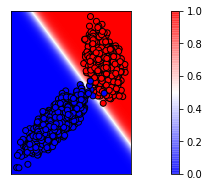

In [205]:
from sklearn.linear_model import LogisticRegression

mu1 = [2, 2]
mu2 = [-2, -3]
sigma1 = [[0.3, -0.2], [-0.2, 1]]
sigma2 = [[1, 0.8], [0.8, 1]]


X1 = np.random.multivariate_normal(mu1, sigma1, size=2000)
X2 = np.random.multivariate_normal(mu2, sigma2, size=2000)
X = np.r_[X1, X2]
y = np.array([1] * len(X1) + [-1] * len(X2))

demo_clf(LogisticRegression(solver='lbfgs'), X, y, proba=True) # lbgfs: low memory bgfs

**HAA_NOTES:**
.Cas2: LogisticRegression classifier with "quadratic feature's properties"

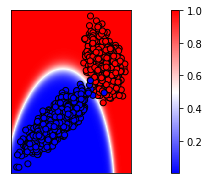

In [207]:
from sklearn.preprocessing import PolynomialFeatures

def demo_clf(clf, X, y, proba=False):
    clf.fit(PolynomialFeatures(2).fit_transform(X), y)

    h = .02  # step size in the mesh
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    XX = PolynomialFeatures(2).fit_transform(np.c_[xx.ravel(), yy.ravel()])  # on transforme un modèle linéaire en un modèle qudratique
    if proba:
        Z = clf.predict_proba(XX)[:, 1]
    else:
        Z = clf.predict(XX)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    cmap = plt.cm.bwr
    plt.pcolormesh(xx, yy, Z, cmap=cmap, clim=[0, 1])
    plt.colorbar()

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap)

    plt.axis('square')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

demo_clf(LogisticRegression(solver='lbfgs'), X, y, proba=True)